In [2]:
# standard library imports
import csv
import datetime as dt
from datetime import date
import json
import os
import statistics
import time
import seaborn as sns
import matplotlib.pyplot as plt

# third-party imports
import numpy as np
import pandas as pd
import requests
from selenium import webdriver
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session

In [3]:
def get_request(url, parameters=None):
    """Return json-formatted response of a get request using optional parameters.
    
    Parameters
    ----------
    url : string
    parameters : {'parameter': 'value'}
        parameters to pass as part of get request
    
    Returns
    -------
    json_data
        json-formatted response (dict-like)
    """
    try:
        response = requests.get(url=url, params=parameters)
    except SSLError as s:
        print('SSL Error:', s)
        
        for i in range(5, 0, -1):
            print('\rWaiting... ({})'.format(i), end='')
            time.sleep(0.2)
        print('\rRetrying.' + ' '*10)
        
        # recusively try again
        return get_request(url, parameters)
    
    if response:
        return response.json()
    else:
        # response is none usually means too many requests. Wait and try again 
        print('No response, waiting 10 seconds...')
        time.sleep(10)
        print('Retrying.')
        return get_request(url, parameters)

In [26]:
client_ID = "85b5e30f8b7f2f2a"
client_secret = "6e74f48cf70a783a47e32ac6d57d6b3d0835f042"


In [5]:
"https://api.isthereanydeal.com"

SyntaxError: invalid syntax (3429749837.py, line 1)

In [6]:
URL = "https://api.isthereanydeal.com/games/prices/v2"

In [23]:
API_key = "879af0dde0d4722269dd3914546699d59cba393e"

In [36]:
response = requests.post(url = 'https://api.isthereanydeal.com/games/prices/v2/', data = {'grant_type': 'client_credentials', 'client_id': client_ID, 'client_secret': client_secret}, allow_redirects=True) #data={'country': 'AU', 'id': '01849782-1017-7389-8de4-c97c587fd7e3'} headers = {'key': API_key},auth = (client_ID, client_secret)
response

<Response [404]>

In [32]:
response.json()

{'status_code': 404, 'reason_phrase': 'Not Found'}

In [16]:
df = pd.DataFrame.from_dict(response.json())

ValueError: If using all scalar values, you must pass an index

In [26]:
headers = {
    'Authorization' : API_key
}

In [28]:
with requests.get(URL, headers=headers) as response:
    data = response.json()
data

{'status_code': 403, 'reason_phrase': 'Missing api key'}

In [14]:
authorization_base_url = 'https://isthereanydeal.com/oauth/authorize/'
token_url = 'https://isthereanydeal.com/oauth/token/'
redirect_uri = 'https://api.isthereanydeal.com/games/info/v2'

In [11]:
client = BackendApplicationClient(client_id=client_ID)
oauth = OAuth2Session(client=client)

In [15]:
# Get authorization URL
authorization_url, state = oauth.authorization_url(authorization_base_url)


NotImplementedError: Must be implemented by inheriting classes.

In [18]:
response = requests.get(url="https://api.isthereanydeal.com/games/info/v2", params=None)
response

<Response [403]>

In [17]:
response = oauth.get("https://api.isthereanydeal.com/games/info/v2")
response

<Response [403]>

In [ ]:

# Redirect the user to the authorization URL
print('Please go here and authorize:', authorization_url)

In [84]:
url = 'https://steamspy.com/api.php?request=all&page=1'
parameters = {"request": "all"}
json_data = get_request(url, parameters=parameters)
steam_spy_page2 = pd.DataFrame.from_dict(json_data, orient='index')
print(steam_spy_page2)

         appid                                         name  \
437900  437900                               Party Jousting   
704270  704270                              Generation Zero   
265550  265550             Dead Rising 3 Apocalypse Edition   
34830    34830                        Sniper: Ghost Warrior   
230290  230290                             Universe Sandbox   
...        ...                                          ...   
215510  215510              Rocketbirds: Hardboiled Chicken   
40400    40400                        AI War: Fleet Command   
987350  987350                             PlanetSide Arena   
272470  272470  The Incredible Adventures of Van Helsing II   
284950  284950                         Pixel Puzzles: Japan   

                           developer              publisher score_rank  \
437900              vikingfabian.com       vikingfabian.com              
704270            Systemic Reaction™     Systemic Reaction™              
265550  Capcom Game S

In [85]:
steam_spy_combined = pd.DataFrame.merge(steam_spy_page_1, steam_spy_page2, how="outer")
print(steam_spy_combined)

        appid                                         name  \
0         570                                       Dota 2   
1         730             Counter-Strike: Global Offensive   
2      578080                          PUBG: BATTLEGROUNDS   
3         440                              Team Fortress 2   
4     1063730                                    New World   
...       ...                                          ...   
1995   215510              Rocketbirds: Hardboiled Chicken   
1996    40400                        AI War: Fleet Command   
1997   987350                             PlanetSide Arena   
1998   272470  The Incredible Adventures of Van Helsing II   
1999   284950                         Pixel Puzzles: Japan   

                             developer              publisher score_rank  \
0                                Valve                  Valve              
1     Valve, Hidden Path Entertainment                  Valve              
2                        KR

In [86]:
url = 'https://steamspy.com/api.php?request=all&page=2'
parameters = {"request": "all"}
json_data = get_request(url, parameters=parameters)
steam_spy_page3 = pd.DataFrame.from_dict(json_data, orient='index')


In [88]:
steam_spy_combined = pd.DataFrame.merge(steam_spy_combined, steam_spy_page3, how="outer")
print(steam_spy_combined)

        appid                                         name  \
0         570                                       Dota 2   
1         730             Counter-Strike: Global Offensive   
2      578080                          PUBG: BATTLEGROUNDS   
3         440                              Team Fortress 2   
4     1063730                                    New World   
...       ...                                          ...   
2994  1057850                                   Neon Boost   
2995   663380  Tales from Candlekeep: Tomb of Annihilation   
2996   322680                                    BLACKHOLE   
2997   861650              Session: Skateboarding Sim Game   
2998   354200                                      Aberoth   

                              developer           publisher score_rank  \
0                                 Valve               Valve              
1      Valve, Hidden Path Entertainment               Valve              
2                         KRAFTON

In [89]:
url = 'https://steamspy.com/api.php?request=all&page=3'
parameters = {"request": "all"}
json_data = get_request(url, parameters=parameters)
steam_spy_page4 = pd.DataFrame.from_dict(json_data, orient='index')
print(steam_spy_page4)

           appid                                         name  \
242960    242960                 Blood Omen 2: Legacy of Kain   
354200    354200                                      Aberoth   
1057850  1057850                                   Neon Boost   
322680    322680                                    BLACKHOLE   
663380    663380  Tales from Candlekeep: Tomb of Annihilation   
...          ...                                          ...   
344850    344850                                   Big Pharma   
1363850  1363850                               THE IMPOSSIBLE   
473540    473540                         Raise Your Own Clone   
80310      80310                                   Gemini Rue   
46560      46560           Robin Hood: The Legend of Sherwood   

                                 developer           publisher score_rank  \
242960                                             Square Enix              
354200   Jarbit, Castle art by Yuriy Gusev              Jarbit   

In [90]:
steam_spy_combined = pd.DataFrame.merge(steam_spy_combined, steam_spy_page4, how="outer")
print(steam_spy_combined)

        appid                                name  \
0         570                              Dota 2   
1         730    Counter-Strike: Global Offensive   
2      578080                 PUBG: BATTLEGROUNDS   
3         440                     Team Fortress 2   
4     1063730                           New World   
...       ...                                 ...   
3989   344850                          Big Pharma   
3990  1363850                      THE IMPOSSIBLE   
3991   473540                Raise Your Own Clone   
3992    80310                          Gemini Rue   
3993    46560  Robin Hood: The Legend of Sherwood   

                             developer           publisher score_rank  \
0                                Valve               Valve              
1     Valve, Hidden Path Entertainment               Valve              
2                        KRAFTON, Inc.       KRAFTON, Inc.              
3                                Valve               Valve             

In [91]:
url = 'https://steamspy.com/api.php?request=all&page=4'
parameters = {"request": "all"}
json_data = get_request(url, parameters=parameters)
steam_spy_page5 = pd.DataFrame.from_dict(json_data, orient='index')
print(steam_spy_page5)

           appid                         name  \
914800    914800                  Coffee Talk   
338810    338810            Demise of Nations   
1363850  1363850               THE IMPOSSIBLE   
979920    979920  Supremacy 1914: World War 1   
739080    739080         9 Monkeys of Shaolin   
...          ...                          ...   
1419860  1419860                       Tukoni   
200550    200550     Dungeons - The Dark Lord   
905340    905340                     Heave Ho   
346180    346180                       David.   
7860        7860                  NecroVision   

                                          developer  \
914800                             Toge Productions   
338810                             Noble Master LLC   
1363850                       IMPOSSIBLE INC, Airem   
979920                              Bytro Labs GmbH   
739080                                Sobaka Studio   
...                                             ...   
1419860  Oksana Bula, Alex

In [92]:
steam_spy_combined = pd.DataFrame.merge(steam_spy_combined, steam_spy_page5, how="outer")
print(steam_spy_combined)

        appid                              name  \
0         570                            Dota 2   
1         730  Counter-Strike: Global Offensive   
2      578080               PUBG: BATTLEGROUNDS   
3         440                   Team Fortress 2   
4     1063730                         New World   
...       ...                               ...   
4985  1419860                            Tukoni   
4986   200550          Dungeons - The Dark Lord   
4987   905340                          Heave Ho   
4988   346180                            David.   
4989     7860                       NecroVision   

                                       developer                   publisher  \
0                                          Valve                       Valve   
1               Valve, Hidden Path Entertainment                       Valve   
2                                  KRAFTON, Inc.               KRAFTON, Inc.   
3                                          Valve                   

In [93]:
url = 'https://steamspy.com/api.php?request=all&page=5'
parameters = {"request": "all"}
json_data = get_request(url, parameters=parameters)
steam_spy_page6 = pd.DataFrame.from_dict(json_data, orient='index')
print(steam_spy_page6)

           appid                              name         developer  \
461620    461620                 Predynastic Egypt   Clarus Victoria   
905340    905340                          Heave Ho  Le Cartel Studio   
790850    790850                      Undead Horde        10tons Ltd   
1487560  1487560              StarCrawlers Chimera  Juggernaut Games   
297210    297210                            Famaze   Oryx Design Lab   
...          ...                               ...               ...   
1484800  1484800                      Zardy's Maze         SwankyBox   
99100      99100  Dungeons and Dragons: Daggerdale      Bedlam Games   
18070      18070                      The Baconing     Hothead Games   
851530    851530                         Mini-Dead        Alec Smith   
329970    329970                          KeeperRL  Electric Succubi   

                   publisher score_rank  positive  negative  userscore  \
461620       Clarus Victoria                 1433       131  

In [94]:
steam_spy_combined = pd.DataFrame.merge(steam_spy_combined, steam_spy_page6, how="outer")
print(steam_spy_combined)

        appid                              name  \
0         570                            Dota 2   
1         730  Counter-Strike: Global Offensive   
2      578080               PUBG: BATTLEGROUNDS   
3         440                   Team Fortress 2   
4     1063730                         New World   
...       ...                               ...   
5982  1484800                      Zardy's Maze   
5983    99100  Dungeons and Dragons: Daggerdale   
5984    18070                      The Baconing   
5985   851530                         Mini-Dead   
5986   329970                          KeeperRL   

                             developer            publisher score_rank  \
0                                Valve                Valve              
1     Valve, Hidden Path Entertainment                Valve              
2                        KRAFTON, Inc.        KRAFTON, Inc.              
3                                Valve                Valve              
4                

In [112]:
csvlocation = pd.DataFrame.to_csv(steam_spy_combined, "data/steam_spy_combined_data_dirty.csv")
# generate sorted app_list from steamspy data
app_list = steam_spy_combined[['appid', 'name']].sort_values('appid').reset_index(drop=True)

In [99]:
steamcsv = app_list.to_csv('data/app_list.csv', index=False)

In [100]:
# instead read from stored csv
app_list = pd.read_csv('data/app_list.csv')

# display first few rows

app_list.head()

,appid,name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force


In [257]:
def get_app_data(start, stop, parser, pause):
    """Return list of app data generated from parser.
    
    parser : function to handle request
    """
    app_data = []
    
    # iterate through each row of app_list, confined by start and stop
    for index, row in app_list[start:stop].iterrows():
        print('Current index: {}'.format(index), end='\r')
        
        appid = row['appid']
        name = row['name']

        # retrive app data for a row, handled by supplied parser, and append to list
        data = parser(appid, name)
        app_data.append(data)

        time.sleep(pause) # prevent overloading api with requests
    
    return app_data

In [258]:
def process_batches(parser, app_list, download_path, data_filename, index_filename,
                    columns, begin=0, end=-1, batchsize=1000, pause=0.2):
    """Process app data in batches, writing directly to file.
    
    parser : custom function to format request
    app_list : dataframe of appid and name
    download_path : path to store data
    data_filename : filename to save app data
    index_filename : filename to store highest index written
    columns : column names for file
    
    Keyword arguments:
    
    begin : starting index (get from index_filename, default 0)
    end : index to finish (defaults to end of app_list)
    batchsize : number of apps to write in each batch (default 100)
    pause : time to wait after each api request (defualt 1)
    
    returns: none
    """
    print('Starting at index {}:\n'.format(begin))
    
    # by default, process all apps in app_list
    if end == -1:
        end = len(app_list) + 1
    
    # generate array of batch begin and end points
    batches = np.arange(begin, end, batchsize)
    batches = np.append(batches, end)
    
    apps_written = 0
    batch_times = []
    
    for i in range(len(batches) - 1):
        start_time = time.time()
        
        start = batches[i]
        stop = batches[i+1]
        
        app_data = get_app_data(start, stop, parser, pause)
        
        rel_path = os.path.join(download_path, data_filename)
        
        # writing app data to file
        with open(rel_path, 'a', newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=columns, extrasaction='ignore')
            
            for j in range(3,0,-1):
                print("\rAbout to write data, don't stop script! ({})".format(j), end='')
                time.sleep(0.1)
            
            writer.writerows(app_data)
            print('\rExported lines {}-{} to {}.'.format(start, stop-1, data_filename), end=' ')
            
        apps_written += len(app_data)
        
        idx_path = os.path.join(download_path, index_filename)
        
        # writing last index to file
        with open(idx_path, 'w') as f:
            index = stop
            print(index, file=f)
            
        # logging time taken
        end_time = time.time()
        time_taken = end_time - start_time
        
        batch_times.append(time_taken)
        mean_time = statistics.mean(batch_times)
        
        est_remaining = (len(batches) - i - 2) * mean_time
        
        remaining_td = dt.timedelta(seconds=round(est_remaining))
        time_td = dt.timedelta(seconds=round(time_taken))
        mean_td = dt.timedelta(seconds=round(mean_time))
        
        print('Batch {} time: {} (avg: {}, remaining: {})'.format(i, time_td, mean_td, remaining_td))
            
    print('\nProcessing batches complete. {} apps written'.format(apps_written))

In [259]:
def reset_index(download_path, index_filename):
    """Reset index in file to 0."""
    rel_path = os.path.join(download_path, index_filename)
    
    with open(rel_path, 'w') as f:
        print(0, file=f)
        

def get_index(download_path, index_filename):
    """Retrieve index from file, returning 0 if file not found."""
    try:
        rel_path = os.path.join(download_path, index_filename)

        with open(rel_path, 'r') as f:
            index = int(f.readline())
    
    except FileNotFoundError:
        index = 0
        
    return index


def prepare_data_file(download_path, filename, index, columns):
    """Create file and write headers if index is 0."""
    if index == 0:
        rel_path = os.path.join(download_path, filename)

        with open(rel_path, 'w', newline='') as f:
            writer = csv.DictWriter(f, fieldnames=columns)
            writer.writeheader()

In [260]:
def parse_steam_request(appid, name):
    """Unique parser to handle data from Steam Store API.
    
    Returns : json formatted data (dict-like)
    """
    url = "http://store.steampowered.com/api/appdetails/"
    parameters = {"appids": appid}
    
    json_data = get_request(url, parameters=parameters)
    json_app_data = json_data[str(appid)]
    
    if json_app_data['success']:
        data = json_app_data['data']
    else:
        data = {'name': name, 'steam_appid': appid}
        
    return data

In [261]:
# Set file parameters
download_path = 'data'
steam_app_data = 'steam_spy_combined_review_data.csv'
steam_index = 'steam_index.txt'



In [262]:
steam_columns = [
    'type', 'name', 'steam_appid', 'required_age', 'is_free', 'controller_support',
    'dlc', 'fullgame',
    'supported_languages', 'header_image', 'website',
    'developers', 'publishers', 'demos', 'price_overview',
    'platforms', 'metacritic', 'reviews', 'categories', 'genres',
    'movies', 'recommendations', 'achievements', 'release_date', 'support_info',
    'background', 'content_descriptors'
]

# # Overwrites last index for demonstration (would usually store highest index so can continue across sessions)
reset_index(download_path, steam_index)

# # Retrieve last index downloaded from file
index = get_index(download_path, steam_index)

# Wipe or create data file and write headers if index is 0
prepare_data_file(download_path, steam_app_data, index, steam_columns)

# Set end and chunksize for demonstration - remove to run through entire app list
process_batches(
    parser=parse_steam_request,
    app_list=app_list,
    download_path=download_path,
    data_filename=steam_app_data,
    index_filename=steam_index,
    columns=steam_columns,
    begin=index,
    end=6000,
    batchsize=40
)

Starting at index 0:

Exported lines 0-39 to steam_spy_combined_review_data.csv. Batch 0 time: 0:00:30 (avg: 0:00:30, remaining: 1:15:05)
Exported lines 40-79 to steam_spy_combined_review_data.csv. Batch 1 time: 0:00:31 (avg: 0:00:30, remaining: 1:14:59)
Exported lines 80-119 to steam_spy_combined_review_data.csv. Batch 2 time: 0:00:31 (avg: 0:00:31, remaining: 1:14:54)
Exported lines 120-159 to steam_spy_combined_review_data.csv. Batch 3 time: 0:00:31 (avg: 0:00:31, remaining: 1:14:33)
Exported lines 160-199 to steam_spy_combined_review_data.csv. Batch 4 time: 0:00:30 (avg: 0:00:31, remaining: 1:13:55)
Exported lines 200-239 to steam_spy_combined_review_data.csv. Batch 5 time: 0:00:31 (avg: 0:00:31, remaining: 1:13:43)
Exported lines 240-279 to steam_spy_combined_review_data.csv. Batch 6 time: 0:00:30 (avg: 0:00:31, remaining: 1:12:57)
No response, waiting 10 seconds...
Retrying.
No response, waiting 10 seconds...
Retrying.
No response, waiting 10 seconds...
Retrying.
No response, wai

In [113]:
def parse_steamspy_request(appid, name):
    """Parser to handle SteamSpy API data."""
    url = "https://steamspy.com/api.php"
    parameters = {"request": "appdetails", "appid": appid}
    
    json_data = get_request(url, parameters)
    return json_data


# set files and columns
download_path = 'data'
steamspy_data = 'steam_spy_combined_data.csv'
steamspy_index = 'steamspy_index.txt'

steamspy_columns = [
    'appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
    'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
    'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
    'languages', 'genre', 'ccu', 'tags'
]

reset_index("data/","steamspy_index")
index = get_index("data/", "steamspy_index")

# Wipe data file if index is 0
prepare_data_file(download_path, steamspy_data, index, steamspy_columns)

process_batches(
    parser=parse_steamspy_request,
    app_list=app_list,
    download_path=download_path, 
    data_filename=steamspy_data,
    index_filename=steamspy_index,
    columns=steamspy_columns,
    begin=index,
    end=6000,
    batchsize=40,
    pause=0.1
)

Starting at index 0:

Exported lines 0-39 to steam_spy_combined_data.csv. Batch 0 time: 0:00:39 (avg: 0:00:39, remaining: 1:36:08)
Exported lines 40-79 to steam_spy_combined_data.csv. Batch 1 time: 0:00:37 (avg: 0:00:38, remaining: 1:33:10)
Exported lines 80-119 to steam_spy_combined_data.csv. Batch 2 time: 0:00:37 (avg: 0:00:37, remaining: 1:31:48)
Exported lines 120-159 to steam_spy_combined_data.csv. Batch 3 time: 0:00:36 (avg: 0:00:37, remaining: 1:30:13)
Exported lines 160-199 to steam_spy_combined_data.csv. Batch 4 time: 0:00:37 (avg: 0:00:37, remaining: 1:29:32)
Exported lines 200-239 to steam_spy_combined_data.csv. Batch 5 time: 0:00:36 (avg: 0:00:37, remaining: 1:28:35)
Exported lines 240-279 to steam_spy_combined_data.csv. Batch 6 time: 0:00:35 (avg: 0:00:37, remaining: 1:27:22)
Exported lines 280-319 to steam_spy_combined_data.csv. Batch 7 time: 0:00:36 (avg: 0:00:37, remaining: 1:26:34)
Exported lines 320-359 to steam_spy_combined_data.csv. Batch 8 time: 0:00:39 (avg: 0:00:

In [3]:
steamSpyData = pd.read_csv("data/steam_spy_combined_data.csv")
steamSpyData

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,191894,4915,0,"10,000,000 .. 20,000,000",10534,1525,309,668,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,16162,"{'Action': 5379, 'FPS': 4798, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,5365,891,0,"2,000,000 .. 5,000,000",1003,0,11,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,99,"{'Action': 745, 'FPS': 306, 'Multiplayer': 257..."
2,30,Day of Defeat,Valve,Valve,NaN,4972,552,0,"5,000,000 .. 10,000,000",931,0,19,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,127,"{'FPS': 786, 'World War II': 247, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,1839,409,0,"5,000,000 .. 10,000,000",1204,0,5,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,12,"{'Action': 629, 'FPS': 139, 'Classic': 107, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,13083,651,0,"5,000,000 .. 10,000,000",1150,0,130,0,499,499,0,"English, French, German, Korean",Action,101,"{'FPS': 879, 'Action': 321, 'Classic': 250, 'S..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,1812960,Floor is Lava,galesoozka,galesoozka,NaN,24,2,0,"200,000 .. 500,000",0,0,0,0,749,1499,50,English,"Adventure, Indie",0,"{'Mystery Dungeon': 292, 'Adventure': 291, 'Du..."
5983,1821060,Find The Sunbed,DS | Voxaol,DS | Voxaol,NaN,5,0,0,"200,000 .. 500,000",0,0,0,0,199,199,0,"English, French, German, Polish, Russian, Span...","Action, Adventure, Indie",0,"{'Singleplayer': 343, '3D': 337, 'Parkour': 33..."
5984,1827870,DarkHouse,VD Games,VD Games,NaN,12,5,0,"100,000 .. 200,000",0,0,0,0,499,499,0,"English, Russian","Adventure, Indie",0,"{'Horror': 198, 'Old School': 191, 'Survival':..."
5985,1844190,Deep Cave,DunkenD,galesoozka,NaN,9,1,0,"100,000 .. 200,000",0,0,0,0,2999,2999,0,English,Adventure,0,"{'Mystery Dungeon': 292, 'Adventure': 289, 'Du..."


In [4]:
no_duplicates = steamSpyData.drop_duplicates()
clean_game_data = pd.DataFrame.to_csv(no_duplicates, "data/merge_all.csv")

In [4]:
data_set = pd.read_csv("data/merge_all.csv")
print(data_set.columns)
review_data= pd.read_csv("data/steam_spy_combined_review_data.csv")
print(review_data.columns)

Index(['Unnamed: 0', 'appid', 'name', 'developer', 'publisher', 'score_rank',
       'positive', 'negative', 'userscore', 'owners', 'average_forever',
       'average_2weeks', 'median_forever', 'median_2weeks', 'price',
       'initialprice', 'discount', 'languages', 'genre', 'ccu', 'tags'],
      dtype='object')
Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'fullgame', 'supported_languages',
       'header_image', 'website', 'developers', 'publishers', 'demos',
       'price_overview', 'platforms', 'metacritic', 'reviews', 'categories',
       'genres', 'movies', 'recommendations', 'achievements', 'release_date',
       'support_info', 'background', 'content_descriptors'],
      dtype='object')


In [5]:
merged_data = pd.merge(data_set, review_data, how="outer") 
merged_data

,Unnamed: 0,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,reviews,categories,genres,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,0.0,10.0,Counter-Strike,Valve,Valve,NaN,191894.0,4915.0,0.0,"10,000,000 .. 20,000,000",...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 117585},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,1.0,20.0,Team Fortress Classic,Valve,Valve,NaN,5365.0,891.0,0.0,"2,000,000 .. 5,000,000",...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 4438},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,2.0,30.0,Day of Defeat,Valve,Valve,NaN,4972.0,552.0,0.0,"5,000,000 .. 10,000,000",...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 3103},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,3.0,40.0,Deathmatch Classic,Valve,Valve,NaN,1839.0,409.0,0.0,"5,000,000 .. 10,000,000",...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 1481},NaN,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
4,4.0,50.0,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,13083.0,651.0,0.0,"5,000,000 .. 10,000,000",...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 11148},NaN,"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,NaN,NaN,IdleOn - The Idle MMO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '4', 'description': 'Casual'}, {'id': ...","[{'id': 256869156, 'name': 'IdleOn Promo', 'th...",NaN,"{'total': 57, 'highlighted': [{'name': 'The Sc...","{'coming_soon': False, 'date': '2 Apr, 2021'}","{'url': 'https://www.legendsofidleon.com/', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
6401,NaN,NaN,VRoid Studio v1.2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"[{'id': '37', 'description': 'Free to Play'}, ...","[{'id': 256858256, 'name': 'renewal', 'thumbna...",NaN,NaN,"{'coming_soon': False, 'date': '23 Dec, 2020'}",{'url': 'https://vroid.pixiv.help/hc/ja/reques...,https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
6402,NaN,NaN,Spiritwish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 256813960, 'name': 'SpiritwishTrailer'...",NaN,NaN,"{'coming_soon': False, 'date': '31 Mar, 2021'}","{'url': '', 'email': 'support@spiritwishhelp.z...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
6403,NaN,NaN,Battlefield™ 2042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 256865281, 'name': 'Accolades Trailer'...",{'total': 88920},"{'total': 34, 'highlighted': [{'name': 'Adapt ...","{'coming_soon': False, 'date': '19 Nov, 2021'}","{'url': 'https://help.ea.com/', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': None}"


In [7]:
merged_data.keys()
print(type(merged_data["genre"]))
print(data_set.columns)

<class 'pandas.core.series.Series'>
Index(['Unnamed: 0', 'appid', 'name', 'developer', 'publisher', 'score_rank',
       'positive', 'negative', 'userscore', 'owners', 'average_forever',
       'average_2weeks', 'median_forever', 'median_2weeks', 'price',
       'initialprice', 'discount', 'languages', 'genre', 'ccu', 'tags'],
      dtype='object')


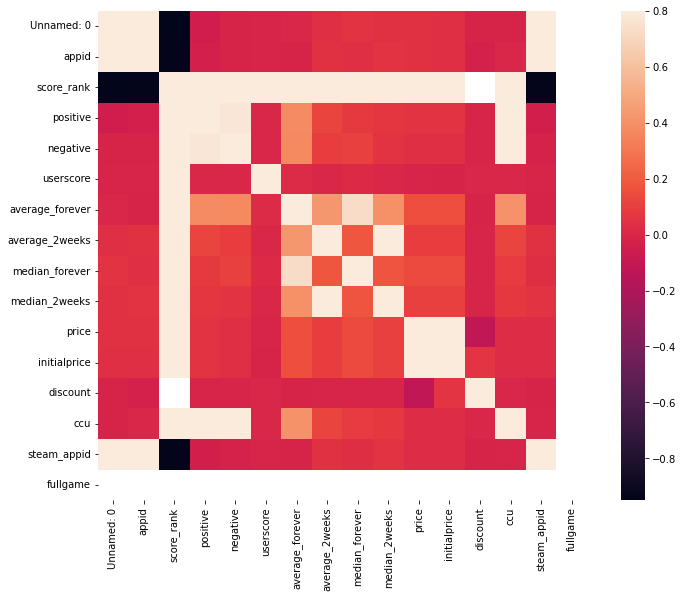

In [6]:
corrmat = merged_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [8]:
genres = data_set["genre"].str.split(pat=",")
unique_genres = []
for genre in genres: 
    unique_genres.append(genre)
print(unique_genres)

[['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action', ' Free to Play'], ['Action'], ['Action'], ['Action', ' Free to Play', ' Strategy'], ['Action', ' Adventure'], ['Action'], ['Action', ' Free to Play'], ['Action'], ['Action'], ['Action'], ['Action'], ['Indie', ' Strategy'], ['Indie', ' Strategy'], ['Indie', ' Strategy'], ['Indie'], ['RPG'], ['Animation & Modeling', ' Video Production'], ['Strategy'], ['RPG'], ['Action', ' RPG'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action', ' Indie', ' RPG'], ['Action', ' Indie', ' RPG'], ['Action'], ['Action'], ['Casual', ' Indie'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Action'], ['Simulation', ' Strategy'], ['Action'], ['Strategy'], ['

In [44]:

flat_list = []
    # Iterate through the outer list
for element in unique_genres:
    if type(element) is list:
            # If the element is of type list, iterate through the sublist
        for item in element:
            flat_list.append(item)
    else:
        flat_list.append(element)
print(flat_list)

['Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', ' Free to Play', 'Action', 'Action', 'Action', ' Free to Play', ' Strategy', 'Action', ' Adventure', 'Action', 'Action', ' Free to Play', 'Action', 'Action', 'Action', 'Action', 'Indie', ' Strategy', 'Indie', ' Strategy', 'Indie', ' Strategy', 'Indie', 'RPG', 'Animation & Modeling', ' Video Production', 'Strategy', 'RPG', 'Action', ' RPG', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', ' Indie', ' RPG', 'Action', ' Indie', ' RPG', 'Action', 'Action', 'Casual', ' Indie', 'Action', 'Action', 'Action', 'Action', 'Action', 'Action', 'Simulation', ' Strategy', 'Action', 'Strategy', 'Strategy', 'Action', ' Simulation', ' Strategy', 'Simulation', ' Strategy', 'Simulation', ' Strategy', 'Action', ' Simulation', 'St

In [45]:
flat_list = set(flat_list)
print(type(flat_list))

<class 'set'>


In [46]:
flat_list = list(flat_list)
f_list = pd.Series(flat_list)
f_list = f_list.drop_duplicates()
f_list

0                     Racing
1                        NaN
2                 Simulation
3               Early Access
4       Animation & Modeling
5      Massively Multiplayer
6                 Accounting
7                  Education
8                  Utilities
9                   Strategy
10                       RPG
11                 Utilities
12          Audio Production
13                    Casual
14                 Adventure
15     Design & Illustration
16          Audio Production
17                   Violent
18         Software Training
19                     Movie
20                 Adventure
21                  Strategy
22         Software Training
23          Video Production
24            Web Publishing
25             Photo Editing
26      Animation & Modeling
27                       RPG
28              Free to Play
29                    Sports
30     Massively Multiplayer
31              Free to Play
32                    Sports
33                     Indie
34          Ga

In [10]:
merged_data["Casual"] = merged_data["tags"].str.contains('Casual')
merged_data["NaN"] = merged_data["tags"].str.contains('NaN')
merged_data["Action"] = merged_data["tags"].str.contains('Action')
merged_data["Accounting"] = merged_data["tags"].str.contains('Accounting')
merged_data["Early Access"] = merged_data["tags"].str.contains('Early')
merged_data["Utilities"] = merged_data["tags"].str.contains('Utilities')
merged_data["Indie"] = merged_data["tags"].str.contains('Indie')
merged_data["Web"] = merged_data["tags"].str.contains('Web')
merged_data["Development"] = merged_data["tags"].str.contains('Development')
merged_data["Simulation"] = merged_data["tags"].str.contains('CaSimulationual')
merged_data["Utilities"] = merged_data["tags"].str.contains('Utilities')
merged_data["RPG"] = merged_data["tags"].str.contains('RPG')
merged_data["Strategy"] = merged_data["tags"].str.contains('Strategy')
merged_data["Free to Play"] = merged_data["tags"].str.contains('Free')
merged_data["Adventure"] = merged_data["tags"].str.contains('Adventure')
merged_data["Movie"] = merged_data["tags"].str.contains('Movie')
merged_data["Violent"] = merged_data["tags"].str.contains('Violent')
merged_data["Animation & Modelling"] = merged_data["tags"].str.contains('Animation')
merged_data["Strategy"] = merged_data["tags"].str.contains('Strategy')
merged_data["Design & Illustration"] = merged_data["tags"].str.contains('Design')
merged_data["Racing"] = merged_data["tags"].str.contains('Racing')
merged_data["Photo Editing"] = merged_data["tags"].str.contains('Photo')
merged_data["Video Production"] = merged_data["tags"].str.contains('Video')
merged_data["MMO"] = merged_data["tags"].str.contains('Massively')
merged_data["Software"] = merged_data["tags"].str.contains('Software')
merged_data["Audio"] = merged_data["tags"].str.contains('Audio')
merged_data["Sports"] = merged_data["tags"].str.contains('Sports')
merged_data["Education"] = merged_data["tags"].str.contains('Education')


In [11]:
merged_data["has_multiplayer"] = merged_data["tags"].str.contains('Multiplayer')
merged_data.head()

,Unnamed: 0,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,Design & Illustration,Racing,Photo Editing,Video Production,MMO,Software,Audio,Sports,Education,has_multiplayer
0,0.0,10.0,Counter-Strike,Valve,Valve,NaN,191894.0,4915.0,0.0,"10,000,000 .. 20,000,000",...,False,False,False,False,False,False,False,False,False,True
1,1.0,20.0,Team Fortress Classic,Valve,Valve,NaN,5365.0,891.0,0.0,"2,000,000 .. 5,000,000",...,False,False,False,False,False,False,False,False,False,True
2,2.0,30.0,Day of Defeat,Valve,Valve,NaN,4972.0,552.0,0.0,"5,000,000 .. 10,000,000",...,False,False,False,False,False,False,False,False,False,True
3,3.0,40.0,Deathmatch Classic,Valve,Valve,NaN,1839.0,409.0,0.0,"5,000,000 .. 10,000,000",...,False,False,False,False,False,False,False,False,False,True
4,4.0,50.0,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,13083.0,651.0,0.0,"5,000,000 .. 10,000,000",...,False,False,False,False,False,False,False,False,False,False


In [12]:
merged_data.columns

Index(['Unnamed: 0', 'appid', 'name', 'developer', 'publisher', 'score_rank',
       'positive', 'negative', 'userscore', 'owners', 'average_forever',
       'average_2weeks', 'median_forever', 'median_2weeks', 'price',
       'initialprice', 'discount', 'languages', 'genre', 'ccu', 'tags', 'type',
       'steam_appid', 'required_age', 'is_free', 'controller_support', 'dlc',
       'fullgame', 'supported_languages', 'header_image', 'website',
       'developers', 'publishers', 'demos', 'price_overview', 'platforms',
       'metacritic', 'reviews', 'categories', 'genres', 'movies',
       'recommendations', 'achievements', 'release_date', 'support_info',
       'background', 'content_descriptors', 'Casual', 'NaN', 'Action',
       'Accounting', 'Early Access', 'Utilities', 'Indie', 'Web',
       'Development', 'Simulation', 'RPG', 'Strategy', 'Free to Play',
       'Adventure', 'Movie', 'Violent', 'Animation & Modelling',
       'Design & Illustration', 'Racing', 'Photo Editing', 'Video

In [13]:
merged_data["has_dlc"] = merged_data["dlc"].notna()
merged_data.head()

,Unnamed: 0,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,...,Racing,Photo Editing,Video Production,MMO,Software,Audio,Sports,Education,has_multiplayer,has_dlc
0,0.0,10.0,Counter-Strike,Valve,Valve,NaN,191894.0,4915.0,0.0,"10,000,000 .. 20,000,000",...,False,False,False,False,False,False,False,False,True,False
1,1.0,20.0,Team Fortress Classic,Valve,Valve,NaN,5365.0,891.0,0.0,"2,000,000 .. 5,000,000",...,False,False,False,False,False,False,False,False,True,False
2,2.0,30.0,Day of Defeat,Valve,Valve,NaN,4972.0,552.0,0.0,"5,000,000 .. 10,000,000",...,False,False,False,False,False,False,False,False,True,False
3,3.0,40.0,Deathmatch Classic,Valve,Valve,NaN,1839.0,409.0,0.0,"5,000,000 .. 10,000,000",...,False,False,False,False,False,False,False,False,True,False
4,4.0,50.0,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,13083.0,651.0,0.0,"5,000,000 .. 10,000,000",...,False,False,False,False,False,False,False,False,False,False


In [34]:
todays_date = date.today()
release_date = merged_data["release_date"]
release_date_df = release_date.to_json("data/release_date.json", orient="index")

In [ ]:
release_date = pd.to_datetime(merged_data["release_date"])


In [47]:
dates = merged_data["release_date"].str.split(pat=" ")
date_list = []
for d in dates: 
    date_list.append(d)
print(date_list)

[["{'coming_soon':", 'False,', "'date':", "'1", 'Nov,', "2000'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Apr,', "1999'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'May,', "2003'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Jun,', "2001'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Nov,', "1999'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Nov,', "2000'}"], ["{'coming_soon':", 'False,', "'date':", "'8", 'Nov,', "1998'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Mar,', "2004'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Jun,', "2001'}"], ["{'coming_soon':", 'False,', "'date':", "'16", 'Nov,', "2004'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Nov,', "2004'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Jun,', "2004'}"], ["{'coming_soon':", 'False,', "'date':", "'12", 'Jul,', "2010'}"], ["{'coming_soon':", 'False,', "'date':", "'1", 'Nov,', "2004'}"], ["{'coming_soon':", 'False,', "'date':", "'27", 'Oct,', "2005'}"], ["{'co

In [50]:
date_list = pd.Series(date_list)

In [51]:
date_list = date_list.rename("coming_soon", "")
date_list

TypeError: rename() takes from 1 to 2 positional arguments but 3 were given

In [43]:
release_dates = pd.read_json("data/release_date.json", orient='index')
release_dates

,0
0,"{'coming_soon': False, 'date': '1 Nov, 2000'}"
1,"{'coming_soon': False, 'date': '1 Apr, 1999'}"
2,"{'coming_soon': False, 'date': '1 May, 2003'}"
3,"{'coming_soon': False, 'date': '1 Jun, 2001'}"
4,"{'coming_soon': False, 'date': '1 Nov, 1999'}"
...,...
6400,"{'coming_soon': False, 'date': '2 Apr, 2021'}"
6401,"{'coming_soon': False, 'date': '23 Dec, 2020'}"
6402,"{'coming_soon': False, 'date': '31 Mar, 2021'}"
6403,"{'coming_soon': False, 'date': '19 Nov, 2021'}"


In [ ]:
merged_data["age"] = (todays_date - merged_data["release_date"])

In [14]:
merged_data.to_csv("data/merged_data_final.csv")

In [171]:
publishers = data_set["publisher"].str.split(pat=",")
unique_pubs = []
for pubs in publishers: 
    unique_pubs.append(pubs)


In [172]:

flat_list_publishers = []
    # Iterate through the outer list
for element in unique_pubs:
    if type(element) is list:
            # If the element is of type list, iterate through the sublist
        for item in element:
            flat_list_publishers.append(item)
    else:
        flat_list_publishers.append(element)
print(flat_list_publishers)

['Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Tripwire Interactive', 'Tripwire Interactive', 'Ritual Entertainment', 'Ritual Entertainment', 'Introversion Software', 'Introversion Software', 'Introversion Software', 'Introversion Software', 'Arkane Studios', 'Valve', 'Topware Interactive', ' ACE', 'Topware Interactive', 'Ubisoft', 'id Software', 'Bethesda Softworks', 'Bethesda-Softworks', 'id Software', 'id Software', 'id Software', 'Bethesda Softworks', 'id Software', 'id Software', 'id Software', 'id Software', 'id Software', 'Blazing Griffin', 'Blazing Griffin Ltd.', 'Ubisoft', 'Frozenbyte', 'Dreamatrix', 'Bohemia Interactive', 'Activision', 'Activision', 'Activision', 'Activision', 'Activision', 'Frontier', ' Aspyr (Mac)', 'THQ Nordic', 'Egosoft', 'Egosoft', 'Egosoft', 'Egosoft', 'Egosoft', 'Ego

In [174]:
flat_list_publishers = set(flat_list_publishers)
flat_list_publishers

{nan,
 '',
 'Anate Studio',
 '1-reality',
 'Over The Moon',
 'Marmalade Game Studio Ltd',
 'Francois Roussel',
 'SP Digital Arts Inc.',
 ' Boltrend Global PTE.LTD',
 'Antizero company',
 'Io-Interactive A/S',
 'Standing Stone Games',
 'Team DOTS',
 ' Feral Interactive (Linux)',
 'Tortuga Team',
 'gigantumgames',
 'Celtaria Productions',
 'Shattered Journal Games',
 'DVloper',
 'The Quinnspiracy',
 'Screeps',
 'Mediascape Co.',
 'Easy Day Studios Pty Ltd',
 'Siactro',
 'Feiyu Technology',
 'Microsoft Studios',
 'UAB Detis',
 'Detach Entertainment',
 ' Linux)',
 'Demon Wagon Studios',
 'Ocean Media LLC',
 'azimuth team',
 'MWM Interactive',
 'Payload Studios',
 'SOFTSTAR',
 'MYTONA',
 'Gradient Studios',
 'Wolfire Games',
 'Applava',
 'TALESSHOP Co.',
 'Coredumping',
 'Capcom U.S.A.',
 'Goldhawk Interactive',
 'Minor Key Games',
 'Mind Body Aware Games LLC',
 'Ltd.',
 'Tiny Roar',
 'HeroCraft PC',
 '香港商河洛互動娛樂股份有限公司',
 'Crackshell',
 'Skunkape Games',
 'Arcen Games',
 'Demolish Games S.A.

In [175]:
developers = data_set["developer"].str.split(pat=",")
unique_devs = []
for devs in developers: 
    unique_devs.append(devs)
    

In [176]:
flat_list_developers = []
    # Iterate through the outer list
for element in unique_devs:
    if type(element) is list:
            # If the element is of type list, iterate through the sublist
        for item in element:
            flat_list_developers.append(item)
    else:
        flat_list_developers.append(element)
print(flat_list_developers)

['Valve', 'Valve', 'Valve', 'Valve', 'Gearbox Software', 'Valve', 'Valve', 'Valve', 'Gearbox Software', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', 'Valve', ' Hidden Path Entertainment', 'Tripwire Interactive', 'Tripwire Interactive', 'Ritual Entertainment', 'Ritual Entertainment', 'Introversion Software', 'Introversion Software', 'Introversion Software', 'Introversion Software', 'Arkane Studios', 'Valve', 'Reality Pump Studios', 'Reality Pump Studios', 'Arkane Studios', 'id Software', 'RavenSoft / id Software', 'id Software', 'id Software', 'id Software', 'id Software', 'id Software', ' Nightdive Studios', ' MachineGames', 'id Software', 'Xatrix Entertainment', 'id Software', 'Raven Software', 'Raven Software', 'Outerlight Ltd.', 'Outerlight Ltd.', 'Outerlight Ltd.', 'Frozenbyte', 'Elephant Games', 'Black Element', 'Troika Games', 'Neversoft', 'Infinity Ward', 'Infinity Ward', 'Gray Mat

In [177]:
flat_list_publishers = set(flat_list_publishers)
flat_list_publishers

{nan,
 '',
 'Anate Studio',
 '1-reality',
 'Over The Moon',
 'Marmalade Game Studio Ltd',
 'Francois Roussel',
 'SP Digital Arts Inc.',
 ' Boltrend Global PTE.LTD',
 'Antizero company',
 'Io-Interactive A/S',
 'Standing Stone Games',
 'Team DOTS',
 ' Feral Interactive (Linux)',
 'Tortuga Team',
 'gigantumgames',
 'Celtaria Productions',
 'Shattered Journal Games',
 'DVloper',
 'The Quinnspiracy',
 'Screeps',
 'Mediascape Co.',
 'Easy Day Studios Pty Ltd',
 'Siactro',
 'Feiyu Technology',
 'Microsoft Studios',
 'UAB Detis',
 'Detach Entertainment',
 ' Linux)',
 'Demon Wagon Studios',
 'Ocean Media LLC',
 'azimuth team',
 'MWM Interactive',
 'Payload Studios',
 'SOFTSTAR',
 'MYTONA',
 'Gradient Studios',
 'Wolfire Games',
 'Applava',
 'TALESSHOP Co.',
 'Coredumping',
 'Capcom U.S.A.',
 'Goldhawk Interactive',
 'Minor Key Games',
 'Mind Body Aware Games LLC',
 'Ltd.',
 'Tiny Roar',
 'HeroCraft PC',
 '香港商河洛互動娛樂股份有限公司',
 'Crackshell',
 'Skunkape Games',
 'Arcen Games',
 'Demolish Games S.A.

In [179]:
wikiurl = "https://en.wikipedia.org/wiki/List_of_video_game_developers"
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
wiki = browser.visit(wikiurl)



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
There is no [win32] chromedriver for browser  in cache
Trying to download new driver from https://chromedriver.storage.googleapis.com/97.0.4692.71/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Zach\.wdm\drivers\chromedriver\win32\97.0.4692.71]


In [181]:
tables = pd.read_html(wikiurl)
tables

[    0                                                  1
 0 NaN  This article needs to be updated. Please help ...,
     0                                                  1
 0 NaN  This list related to video games is incomplete...,
                               0
 0          Active independently
 1          Active as subsidiary
 2  Defunct and no longer active,
               Developer           City Administrative division        Country  \
 0         The NineHertz        Atlanta                     NaN  United States   
 1              0verflow          Tokyo                     NaN          Japan   
 2        11 bit studios         Warsaw    Masovian Voivodeship         Poland   
 3            1C Company         Moscow                     NaN         Russia   
 4           1-Up Studio          Tokyo                     NaN          Japan   
 ..                  ...            ...                     ...            ...   
 714         Zen Studios       Budapest                    

In [196]:
developer_table = tables[3]
developer_table.keys()

Index(['Developer', 'City', 'Administrative division', 'Country', 'Est.',
       'Notable games, series or franchises', 'Notes'],
      dtype='object')

In [251]:
price_filter = data_set[(data_set.price > 0)]
price_filter = price_filter.drop(columns="developer_score")
price_filter = price_filter.drop(columns="discount")
price_filter = price_filter.drop(columns="median_forever")
price_filter = price_filter.drop(columns="median_2weeks")
price_filter = price_filter.drop(columns="Unnamed: 0")
price_filter = price_filter.drop(columns="userscore")
price_filter = price_filter.set_index(['appid'])

In [252]:
price_filter.columns

Index(['name', 'developer', 'publisher', 'score_rank', 'positive', 'negative',
       'owners', 'average_forever', 'average_2weeks', 'initialprice',
       'languages', 'genre', 'ccu', 'tags', 'Casual', 'NaN', 'Action',
       'Accounting', 'Early Access', 'Utilities', 'Indie', 'Web',
       'Development', 'Simulation', 'RPG', 'Strategy', 'Free to Play',
       'Adventure', 'Movie', 'Violent', 'Animation & Modelling',
       'Design & Illustration', 'Racing', 'Photo Editing', 'Video Production',
       'MMO', 'Software', 'Audio', 'Sports', 'Education', 'has_multiplayer',
       'has_dlc', 'Developer_score'],
      dtype='object')

In [253]:
price_filter

,name,developer,publisher,score_rank,positive,negative,owners,average_forever,average_2weeks,initialprice,...,Photo Editing,Video Production,MMO,Software,Audio,Sports,Education,has_multiplayer,has_dlc,Developer_score
appid,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,Valve,Valve,NaN,191894,4915,"10,000,000 .. 20,000,000",10534,1525,999,...,False,False,False,False,False,False,False,True,False,AAA
20,Team Fortress Classic,Valve,Valve,NaN,5365,891,"2,000,000 .. 5,000,000",1003,0,499,...,False,False,False,False,False,False,False,True,False,AAA
30,Day of Defeat,Valve,Valve,NaN,4972,552,"5,000,000 .. 10,000,000",931,0,499,...,False,False,False,False,False,False,False,True,False,AAA
40,Deathmatch Classic,Valve,Valve,NaN,1839,409,"5,000,000 .. 10,000,000",1204,0,499,...,False,False,False,False,False,False,False,True,False,AAA
50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,13083,651,"5,000,000 .. 10,000,000",1150,0,499,...,False,False,False,False,False,False,False,False,False,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812960,Floor is Lava,galesoozka,galesoozka,NaN,24,2,"200,000 .. 500,000",0,0,1499,...,False,False,False,False,False,False,False,False,False,AAA
1821060,Find The Sunbed,DS | Voxaol,DS | Voxaol,NaN,5,0,"200,000 .. 500,000",0,0,199,...,False,False,False,False,False,False,False,True,False,AAA
1827870,DarkHouse,VD Games,VD Games,NaN,12,5,"100,000 .. 200,000",0,0,499,...,False,False,False,False,False,False,False,False,False,AAA


In [223]:
data_set.to_csv("data/sklearn.csv", index = True)

In [254]:
price_filter.to_csv("data/skprice.csv", index=True)

In [289]:
review_data= pd.read_csv("data/steam_spy_combined_review_data.csv")
review_data.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'fullgame', 'supported_languages',
       'header_image', 'website', 'developers', 'publishers', 'demos',
       'price_overview', 'platforms', 'metacritic', 'reviews', 'categories',
       'genres', 'movies', 'recommendations', 'achievements', 'release_date',
       'support_info', 'background', 'content_descriptors'],
      dtype='object')

In [301]:
genres = review_data["genres"].explode()
genre_df = pd.DataFrame(genres)
genre_df.head()

,genres
0,"[{'id': '1', 'description': 'Action'}]"
1,"[{'id': '1', 'description': 'Action'}]"
2,"[{'id': '1', 'description': 'Action'}]"
3,"[{'id': '1', 'description': 'Action'}]"
4,"[{'id': '1', 'description': 'Action'}]"


In [302]:
genre = [g[0].get('description') for g in genre_df["genres"]]

AttributeError: 'str' object has no attribute 'get'

In [276]:
content = review_data["content_descriptors"]
content_df = pd.DataFrame.from_dict(content)
content.head()

0    {'ids': [2, 5], 'notes': 'Includes intense vio...
1    {'ids': [2, 5], 'notes': 'Includes intense vio...
2                           {'ids': [], 'notes': None}
3                           {'ids': [], 'notes': None}
4                           {'ids': [], 'notes': None}
Name: content_descriptors, dtype: object

In [307]:
review_data["dlc"]

0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
               ...        
5982                   NaN
5983    [1834330, 1863600]
5984                   NaN
5985                   NaN
5986                   NaN
Name: dlc, Length: 5987, dtype: object

In [306]:
review_data["has_dlc"] = review_data["dlc"].notna()

review_data

,type,name,steam_appid,required_age,is_free,controller_support,dlc,fullgame,supported_languages,header_image,...,categories,genres,movies,recommendations,achievements,release_date,support_info,background,content_descriptors,has_dlc
0,game,Counter-Strike,10,0,False,NaN,NaN,NaN,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 117585},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio...",False
1,game,Team Fortress Classic,20,0,False,NaN,NaN,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 4438},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio...",False
2,game,Day of Defeat,30,0,False,NaN,NaN,NaN,"English, French, German, Italian, Spanish - Spain",https://cdn.akamai.steamstatic.com/steam/apps/...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 3103},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",False
3,game,Deathmatch Classic,40,0,False,NaN,NaN,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 1481},NaN,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",False
4,game,Half-Life: Opposing Force,50,0,False,NaN,NaN,NaN,"English, French, German, Korean",https://cdn.akamai.steamstatic.com/steam/apps/...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 11148},NaN,"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,game,Floor is Lava,1812960,0,False,NaN,NaN,NaN,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 256859290, 'name': 'Floor is Lava', 't...",NaN,"{'total': 7, 'highlighted': [{'name': 'Enter t...","{'coming_soon': False, 'date': '29 Nov, 2021'}","{'url': '', 'email': 'galesoozka@gmail.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",False
5983,game,Find The Sunbed,1821060,0,False,NaN,"[1834330, 1863600]",NaN,"English, French, German, Polish, Russian, Span...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 256860303, 'name': 'Find The Sunbed Tr...",NaN,"{'total': 16, 'highlighted': [{'name': 'Found ...","{'coming_soon': False, 'date': '7 Dec, 2021'}","{'url': '', 'email': 'dsvoxaol@gmail.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}",True
5984,game,DarkHouse,1827870,0,False,NaN,NaN,NaN,"English<strong>*</strong>, Russian<br><strong>...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 256862900, 'name': 'Trailer Vitaly', '...",NaN,"{'total': 10, 

In [309]:
support = pd.DataFrame.from_dict(review_data["support_info"])
support

,support_info
0,"{'url': 'http://steamcommunity.com/app/10', 'e..."
1,"{'url': '', 'email': ''}"
2,"{'url': '', 'email': ''}"
3,"{'url': '', 'email': ''}"
4,"{'url': 'https://help.steampowered.com', 'emai..."
...,...
5982,"{'url': '', 'email': 'galesoozka@gmail.com'}"
5983,"{'url': '', 'email': 'dsvoxaol@gmail.com'}"
5984,"{'url': 'https://blogogo.net', 'email': 'vdgam..."
5985,"{'url': '', 'email': 'galesoozka@gmail.com'}"


In [323]:
genres = pd.Series(review_data["genres"])
ids, descriptions = zip(*[(ids, descriptions) for (ids, descriptions) in review_data["genres"].iteritems()])
print(descriptions)

("[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}, {'id': '37', 'description': 'Free to Play'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': 'Action'}]", "[{'id': '1', 'description': '

In [317]:
review_data["Action"] = review_data["genre_list"].str.contains('Action')
action_games = review_data["Action"]
print(action_games)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5982   NaN
5983   NaN
5984   NaN
5985   NaN
5986   NaN
Name: Action, Length: 5987, dtype: float64


In [268]:
review_data["Casual"] = review_data["genres"].str.contains('Casual')
review_data["NaN"] = review_data["genres"].str.contains('NaN')
review_data["Action"] = review_data["genres"].str.contains('Action')
review_data["Accounting"] = review_data["genres"].str.contains('Accounting')
review_data["Early Access"] = review_data["genres"].str.contains('Early')
review_data["Utilities"] = review_data["genres"].str.contains('Utilities')
review_data["Indie"] = review_data["genres"].str.contains('Indie')
review_data["Web"] = review_data["genres"].str.contains('Web')
review_data["Development"] = review_data["genres"].str.contains('Development')
review_data["Simulation"] = review_data["genres"].str.contains('CaSimulationual')
review_data["Utilities"] = review_data["genres"].str.contains('Utilities')
review_data["RPG"] = review_data["genres"].str.contains('RPG')
review_data["Strategy"] = review_data["genres"].str.contains('Strategy')
review_data["Free to Play"] = review_data["genres"].str.contains('Free')
review_data["Adventure"] = review_data["genres"].str.contains('Adventure')
review_data["Movie"] = review_data["genres"].str.contains('Movie')
review_data["Violent"] = review_data["genres"].str.contains('Violent')
review_data["Animation & Modelling"] = review_data["genres"].str.contains('Animation')
review_data["Strategy"] = review_data["genres"].str.contains('Strategy')
review_data["Design & Illustration"] = review_data["genres"].str.contains('Design')
review_data["Racing"] = review_data["genres"].str.contains('Racing')
review_data["Photo Editing"] = review_data["genres"].str.contains('Photo')
review_data["Video Production"] = review_data["genres"].str.contains('Video')
review_data["MMO"] = review_data["genres"].str.contains('Massively')
review_data["Software"] = review_data["genres"].str.contains('Software')
review_data["Audio"] = review_data["genres"].str.contains('Audio')
review_data["Sports"] = review_data["genres"].str.contains('Sports')
review_data["Education"] = review_data["genres"].str.contains('Education')

In [339]:
review_data

,type,name,steam_appid,required_age,is_free,controller_support,dlc,fullgame,supported_languages,header_image,...,reviews,categories,genres,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0,False,NaN,NaN,NaN,"English<strong>*</strong>, French<strong>*</st...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 117585},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0,False,NaN,NaN,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 4438},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0,False,NaN,NaN,NaN,"English, French, German, Italian, Spanish - Spain",https://cdn.akamai.steamstatic.com/steam/apps/...,...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 3103},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0,False,NaN,NaN,NaN,"English, French, German, Italian, Spanish - Sp...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 1481},NaN,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0,False,NaN,NaN,NaN,"English, French, German, Korean",https://cdn.akamai.steamstatic.com/steam/apps/...,...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]",NaN,{'total': 11148},NaN,"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,game,Floor is Lava,1812960,0,False,NaN,NaN,NaN,English<strong>*</strong><br><strong>*</strong...,https://cdn.akamai.steamstatic.com/steam/apps/...,...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 256859290, 'name': 'Floor is Lava', 't...",NaN,"{'total': 7, 'highlighted': [{'name': 'Enter t...","{'coming_soon': False, 'date': '29 Nov, 2021'}","{'url': '', 'email': 'galesoozka@gmail.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
5983,game,Find The Sunbed,1821060,0,False,NaN,"[1834330, 1863600]",NaN,"English, French, German, Polish, Russian, Span...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,NaN,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 256860303, 'name': 'Find The Sunbed Tr...",NaN,"{'total': 16, 'highlighted': [{'name': 'Found ...","{'coming_soon': False, 'date': '7 Dec, 2021'}","{'url': '', 'email': 'dsvoxaol@gmail.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
5984,game,DarkHouse,1827870,0,False,NaN,NaN,NaN,"English<strong>*</strong>, Russian<br><strong>...",https://cdn.akamai.steamstatic.com/steam/apps/...,...,NaN,"[{'id': 2, 'description': 'Single-player'}]","[{'id': '25', 'description': 'Adventure'}, {'i...","[{'id': 256862900, 'name': 'Trailer Vitaly', '...",NaN,"{'total': 10, 'highligh

In [338]:
review_data.to_csv("data/review_data_unclean.csv")